# Pricing-European-Call-Option

Presents a class definition for a European call option in the Black- Scholes-Merton (1973) model.

In [1]:
import sys
from pricing_engine import * 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Model test

In [2]:
# parameters
spot_price = 100
strike_price = 105
maturity_years = 1
risk_free_rate = 0.05
volatility = 0.2


In [3]:
# implementation

o = bsm_call_option(spot_price, strike_price, maturity_years, risk_free_rate, volatility)
type(o)

pricing_engine.bsm_call_option

In [4]:
value = o.value()
value

8.021352235143176

In [5]:
o.vega()

39.67052380842653

In [6]:
o.imp_vol(C0=value)

0.2

## Statistics

In [7]:
# statistics packs
import numpy as np

# visualization packs
from pylab import cm, mpl, plt
from mpl_toolkits.mplot3d import Axes3D 
mpl.rcParams['font.family'] = 'serif' 
%matplotlib inline

In [8]:
# generating statistics

maturities = np.linspace(0.05, 2.0, 20) 
strikes = np.linspace(80, 120, 20)
K, T = np.meshgrid(strikes, maturities) 
C = np.zeros_like(K)
V = np.zeros_like(C)
for t in enumerate(maturities):
    for k in enumerate(strikes): 
        o.T = t[1]
        o.K = k[1]
        C[t[0], k[0]] = o.value()
        V[t[0], k[0]] = o.vega()

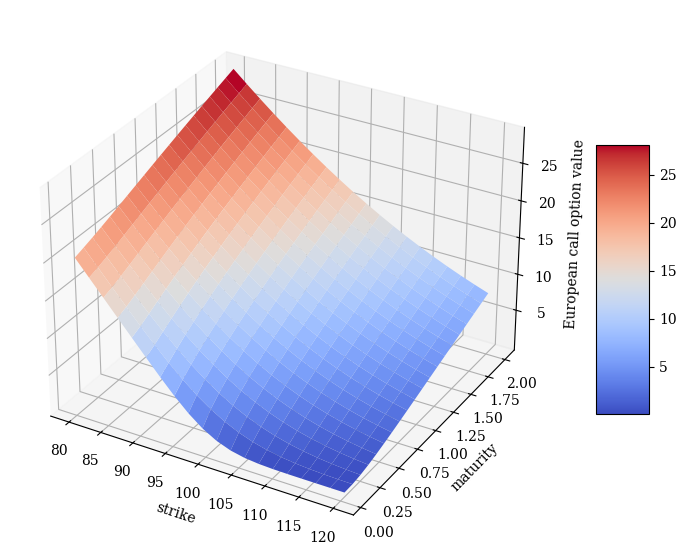

In [9]:
# visualization 
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(K, T, C, rstride=1, cstride=1,
                       cmap=cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('maturity')
ax.set_zlabel('European call option value')
fig.colorbar(surf, shrink=0.5, aspect=5);

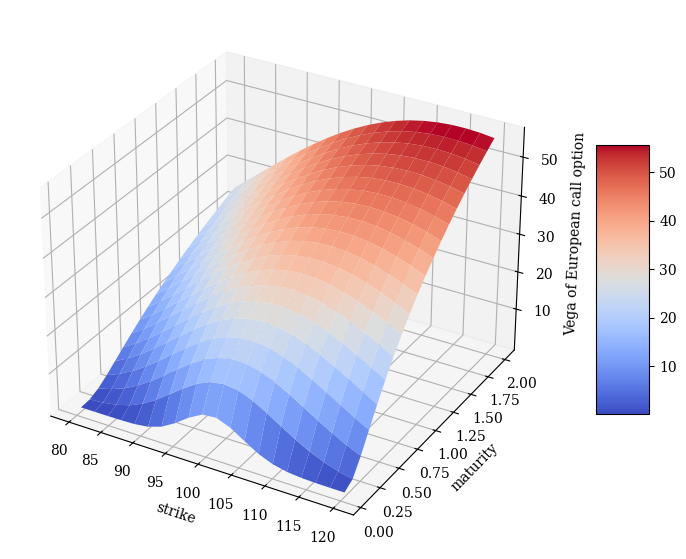

In [10]:
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(K, T, V, rstride=1, cstride=1,
                       cmap=cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('maturity')
ax.set_zlabel('Vega of European call option')
fig.colorbar(surf, shrink=0.5, aspect=5);